In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('train.csv')
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [3]:
data['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [4]:
x = data.drop(['price_range'],axis=1)   ## feature
y = data['price_range']    ## target

In [8]:
len(x.columns)

20

In [9]:
x.shape

(2000, 20)

### Univariate Selection

In [12]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [13]:
best_features = SelectKBest(score_func=chi2,k=10)
fit = best_features.fit(x,y)

In [17]:
dfScores = pd.DataFrame(fit.scores_)
dfColumns = pd.DataFrame(x.columns)
featureScores = pd.concat([dfColumns,dfScores],axis=1)
featureScores.columns = ['Features','Scores']
featureScores

,Features,Scores
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [19]:
featureScores.nlargest(10,'Scores')

,Features,Scores
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


### Feature Importance

In [22]:
data = pd.read_csv('train.csv')
x = data.drop(['price_range'],axis=1)   ## feature
y = data['price_range']    ## target

In [23]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [24]:
model = ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [25]:
model.feature_importances_

array([0.06063139, 0.0194804 , 0.03385849, 0.01948668, 0.03297327,
       0.01718885, 0.0351473 , 0.03286673, 0.03539563, 0.03266552,
       0.03356027, 0.04696766, 0.04982635, 0.39430277, 0.03360183,
       0.03440848, 0.03455649, 0.0140193 , 0.01869345, 0.02036915])

In [27]:
feature_importance = pd.Series(model.feature_importances_,index=x.columns)
feature_importance.nlargest(10)

ram              0.394303
battery_power    0.060631
px_width         0.049826
px_height        0.046968
mobile_wt        0.035396
int_memory       0.035147
talk_time        0.034556
sc_w             0.034408
clock_speed      0.033858
sc_h             0.033602
dtype: float64

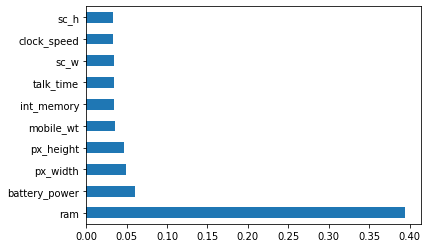

In [28]:
feature_importance.nlargest(10).plot(kind='barh')
plt.show()

### Correlation Matrix (Heatmap)

In [29]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


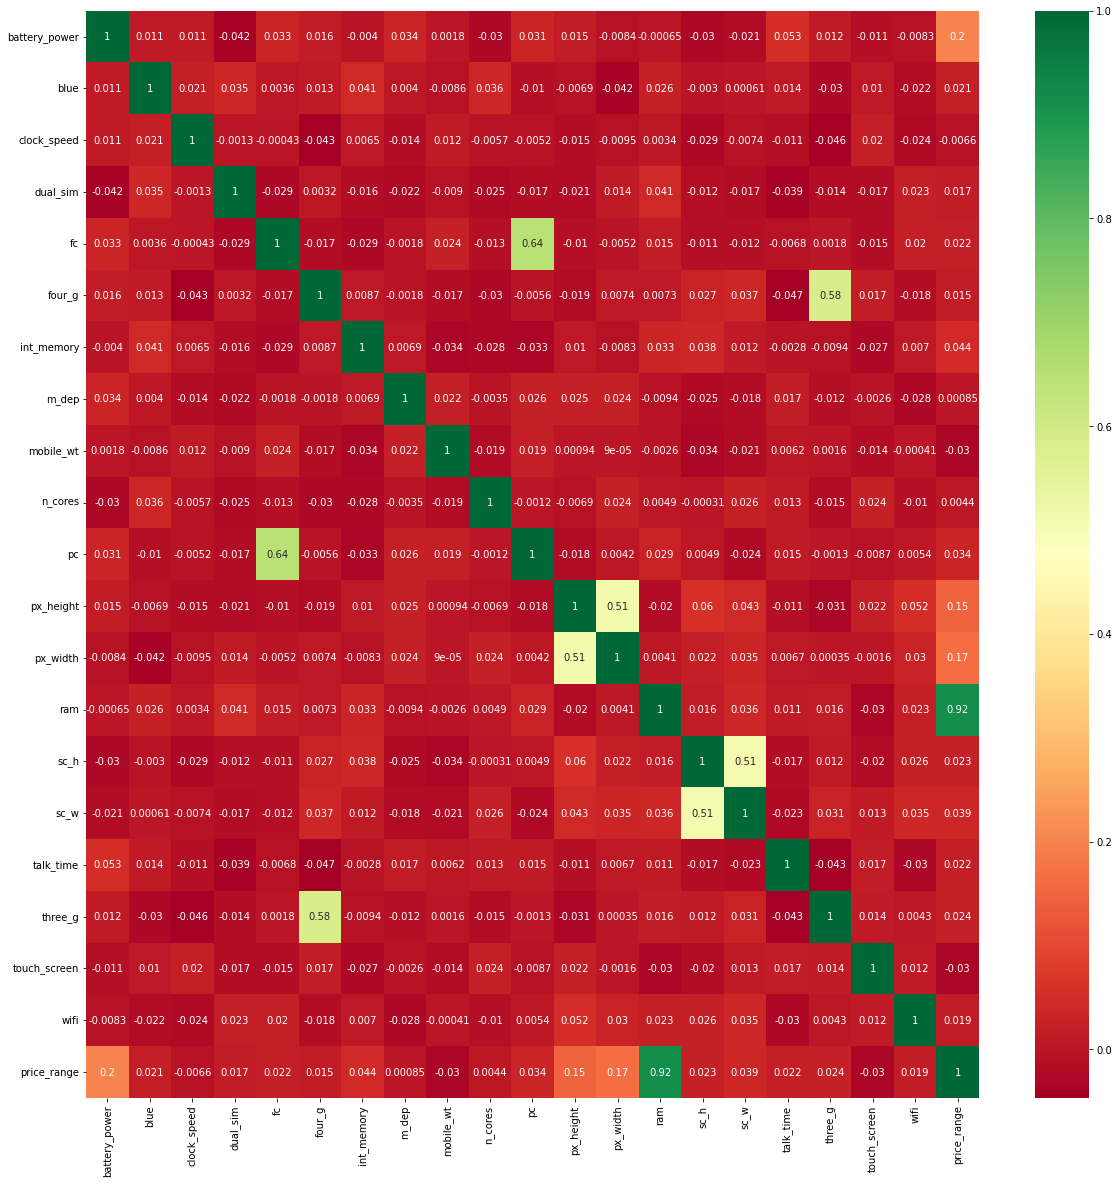

In [33]:
import seaborn as sns
cor_matrix = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(cor_matrix,cmap='RdYlGn',annot=True)
plt.show()